In [1]:
#libraries
import numpy as np
import pandas as pd
from surprise import Dataset
from surprise import SVD
from surprise import Reader

We will be using the dataset module which loads the pandas dataframe that is available for this experiment, The reader function is used to parse a file containing ratings data. The default format in which it accepts data is that each rating is stored in a separate line in the order user, movie and rating

SVD = singular value decomposition

conda install -c conda-forge scikit-surprise

In [2]:
#Loading data
movies=pd.read_csv('movies.csv')
tags=pd.read_csv('tags.csv')
train=pd.read_csv('train.csv')
genome_s=pd.read_csv('genome_scores.csv')
genome_t=pd.read_csv('genome_tags.csv')
imdb=pd.read_csv('imdb_data.csv')
test_df=pd.read_csv('test.csv')
links=pd.read_csv('links.csv')
sub=pd.read_csv('sample_submission.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.info()
movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


movieId    0
title      0
genres     0
dtype: int64

In [7]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [11]:
tags.info()
tags.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [8]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [12]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [14]:
genome_t.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [15]:
genome_t.info()
genome_t.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


tagId    0
tag      0
dtype: int64

In [16]:
genome_s.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [17]:
genome_s.info()
genome_s.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


movieId      0
tagId        0
relevance    0
dtype: int64

In [18]:
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [19]:
imdb.info()
imdb.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [20]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [22]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [24]:
links.info()
links.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [25]:
#sample submission
sub.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [3]:
df_train = train.copy()

In [30]:
#For understanding the data, below the train dataframe is merged with the movies dataframe
df = df_train.merge(movies, on = 'movieId', how= 'left')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller


In [4]:
df= train.merge(movies,
            on='movieId', 
            how='left'
            ).merge(imdb,
            on='movieId',
            how= 'left'
            )
df.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,88.0,"$140,000,000",lingerie|michael jackson character|shorthaired...
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime,Sandra Bullock|Regina King|Enrique Murciano|Wi...,Marc Lawrence,115.0,"$45,000,000",female protagonist|cleave gag|good woman|fbi
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller,Jeff Davis|Heather Langenkamp|Miko Hughes|Matt...,Wes Craven,112.0,"$8,000,000",freddy krueger|elm street|famous director as h...


In [5]:
# Loading as Surprise dataframe
reader = Reader()
# Data selected for model training
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

In [6]:
from surprise.model_selection import train_test_split

In [7]:
# Data split 90/10
trainset, testset = train_test_split(data, test_size=0.1)

In [8]:
# Base algorithm
base = SVD()

In [9]:
# Fitting our trainset
base.fit(trainset)

In [10]:
predictions = base.test(testset) 
predictions

test = pd.DataFrame(predictions)

In [11]:
test.head()

,uid,iid,r_ui,est,details
0,127503,1625,5.0,4.214120,{'was_impossible': False}
1,151902,27700,1.5,3.221665,{'was_impossible': False}
2,80445,911,4.5,4.450628,{'was_impossible': False}
3,50324,2002,4.5,3.780394,{'was_impossible': False}
4,97533,58559,4.5,3.824964,{'was_impossible': False}


In [12]:
# We are trying to predict ratings for every userId / movieId pair, we implement the below list comprehension to achieve this.
ratings_predictions=[base.predict(row.userId, row.movieId) for _,row in test_df.iterrows()]
ratings_predictions

[Prediction(uid=1, iid=2011, r_ui=None, est=3.423038838924612, details={'was_impossible': False}),
 Prediction(uid=1, iid=4144, r_ui=None, est=4.401046378286214, details={'was_impossible': False}),
 Prediction(uid=1, iid=5767, r_ui=None, est=3.613016181464389, details={'was_impossible': False}),
 Prediction(uid=1, iid=6711, r_ui=None, est=3.7448986713894623, details={'was_impossible': False}),
 Prediction(uid=1, iid=7318, r_ui=None, est=2.9616553290210454, details={'was_impossible': False}),
 Prediction(uid=1, iid=8405, r_ui=None, est=4.158051847891909, details={'was_impossible': False}),
 Prediction(uid=1, iid=8786, r_ui=None, est=4.0028096482361555, details={'was_impossible': False}),
 Prediction(uid=2, iid=150, r_ui=None, est=3.5970174869408083, details={'was_impossible': False}),
 Prediction(uid=2, iid=356, r_ui=None, est=4.068294664498523, details={'was_impossible': False}),
 Prediction(uid=2, iid=497, r_ui=None, est=3.503605443693033, details={'was_impossible': False}),
 Predicti

In [13]:
# Converting our prediction into a familiar format-Dataframe
df_pred=pd.DataFrame(ratings_predictions)
df_pred

,uid,iid,r_ui,est,details
0,1,2011,None,3.423039,{'was_impossible': False}
1,1,4144,None,4.401046,{'was_impossible': False}
2,1,5767,None,3.613016,{'was_impossible': False}
3,1,6711,None,3.744899,{'was_impossible': False}
4,1,7318,None,2.961655,{'was_impossible': False}
...,...,...,...,...,...
5000014,162541,4079,None,3.294863,{'was_impossible': False}
5000015,162541,4467,None,3.983922,{'was_impossible': False}
5000016,162541,4980,None,2.831535,{'was_impossible': False}
5000017,162541,5689,None,2.908624,{'was_impossible': False}


In [14]:
# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [15]:
# Snippet of our ratings
df_pred.head()

,userId,movieId,rating
0,1,2011,3.423039
1,1,4144,4.401046
2,1,5767,3.613016
3,1,6711,3.744899
4,1,7318,2.961655


In [16]:
# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

In [17]:
# View the first five rows of the dataframe
df_pred.head()

,userId,movieId,rating,Id
0,1,2011,3.423039,1_2011
1,1,4144,4.401046,1_4144
2,1,5767,3.613016,1_5767
3,1,6711,3.744899,1_6711
4,1,7318,2.961655,1_7318


In [18]:
# Drop the columns: 'userId' and 'movieId'
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [19]:
# View the predicted dataset
df_pred = df_pred[['Id', 'rating']]

In [20]:
# View the first 5 rows
df_pred.head()

,Id,rating
0,1_2011,3.423039
1,1_4144,4.401046
2,1_5767,3.613016
3,1_6711,3.744899
4,1_7318,2.961655


In [21]:
# The submitted base model
df_pred.to_csv("SVD_model_base.csv", index=False)

# EDA

In [26]:
# Get summary statistics of rating
train['rating'].describe()

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

We already merged the data, lets view the merged table

In [22]:
df.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,88.0,"$140,000,000",lingerie|michael jackson character|shorthaired...
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime,Sandra Bullock|Regina King|Enrique Murciano|Wi...,Marc Lawrence,115.0,"$45,000,000",female protagonist|cleave gag|good woman|fbi
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller,Jeff Davis|Heather Langenkamp|Miko Hughes|Matt...,Wes Craven,112.0,"$8,000,000",freddy krueger|elm street|famous director as h...


the data needs some intervention, lets start with the first one, timestamp...and convert this to datatime for our convinience

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   userId         int64  
 1   movieId        int64  
 2   rating         float64
 3   timestamp      int64  
 4   title          object 
 5   genres         object 
 6   title_cast     object 
 7   director       object 
 8   runtime        float64
 9   budget         object 
 10  plot_keywords  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 915.5+ MB


In [24]:
# convert timestamp to datetime
import datetime
df['datetime_timestamp'] = df['timestamp'].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp))

In [25]:
df[df['userId'] == 1].sort_values(by=['datetime_timestamp'])

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,datetime_timestamp
1946297,1,1250,4.0,1147868414,"Bridge on the River Kwai, The (1957)",Adventure|Drama|War,NaN,NaN,NaN,NaN,NaN,2006-05-17 14:20:14
7663247,1,3448,4.0,1147868480,"Good Morning, Vietnam (1987)",Comedy|Drama|War,NaN,NaN,NaN,NaN,NaN,2006-05-17 14:21:20
4080030,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance,NaN,NaN,NaN,NaN,NaN,2006-05-17 14:21:50
2524478,1,4308,3.0,1147868534,Moulin Rouge (2001),Drama|Musical|Romance,Nicole Kidman|Ewan McGregor|John Leguizamo|Jim...,Baz Luhrmann,127.0,"$50,000,000",belle epoque|tragic ending|jealousy|jukebox mu...,2006-05-17 14:22:14
5122500,1,3949,5.0,1147868678,Requiem for a Dream (2000),Drama,Ellen Burstyn|Jared Leto|Jennifer Connelly|Mar...,Hubert Selby Jr.,102.0,"$4,500,000",drug addiction|heroin|sex show|sex scene,2006-05-17 14:24:38
9153002,1,1175,3.5,1147868826,Delicatessen (1991),Comedy|Drama|Romance,Pascal Benezech|Dominique Pinon|Marie-Laure Do...,Jean-Pierre Jeunet,99.0,"FRF24,000,000",black comedy|absurd comedy|surrealist|bed,2006-05-17 14:27:06
5632837,1,1237,5.0,1147868839,"Seventh Seal, The (Sjunde inseglet, Det) (1957)",Drama,NaN,NaN,NaN,NaN,NaN,2006-05-17 14:27:19
7950420,1,8154,5.0,1147868865,"Dolce Vita, La (1960)",Drama,NaN,NaN,NaN,NaN,NaN,2006-05-17 14:27:45
6096394,1,2843,4.5,1147868891,"Black Cat, White Cat (Crna macka, beli macor) ...",Comedy|Romance,Bajram Severdzan|Srdjan 'Zika' Todorovic|Brank...,Gordan Mihic,127.0,NaN,neo screwball comedy|four word title|deal|marr...,2006-05-17 14:28:11
5609884,1,7365,4.0,1147869033,Noi the Albino (Nói albinói) (2003),Drama,Tómas Lemarquis|Þröstur Leó Gunnarsson|Elín Ha...,Dagur Kári,90.0,"EUR1,100,000",fjord|winter|village|snow,2006-05-17 14:30:33


the intervals of the rating were only about a few minutes, whats does that mean? (Train data)

In [29]:
# pre_process the budget column

# remove commas
df['budget'] = df['budget'].str.replace(',', '')

# remove currency signs like "$" and "GBP"
df['budget'] = df['budget'].str.extract('(\d+)', expand=False)

# convert the feature into a float
df['budget'] = df['budget'].astype(float)

# remove nan values and replacing with 0
df['budget'] = df['budget'].replace(np.nan, 0)

# convert the feature into an integer
df['budget'] = df['budget'].astype(int)

In [30]:
#extracting date from title column
df['release_year'] = df.title.str.extract('(\(\d\d\d\d\))', expand=False)

#adding date to realse year column
df['release_year'] = df.release_year.str.extract('(\d\d\d\d)', expand=False)

#view top 2 rows of the dataframe
df.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,datetime_timestamp,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,2018-02-11 13:53:12,2008
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,30000000,fatherhood|doberman|dog|mansion,2008-03-23 04:18:59,1995


In [31]:
#drop duplicates on dataframe
data_1= df.drop_duplicates('movieId')

#view top 2 rows of the dataframe
data_1.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,datetime_timestamp,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,2018-02-11 13:53:12,2008
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,30000000,fatherhood|doberman|dog|mansion,2008-03-23 04:18:59,1995


In [33]:
# visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns
from numpy.random import RandomState

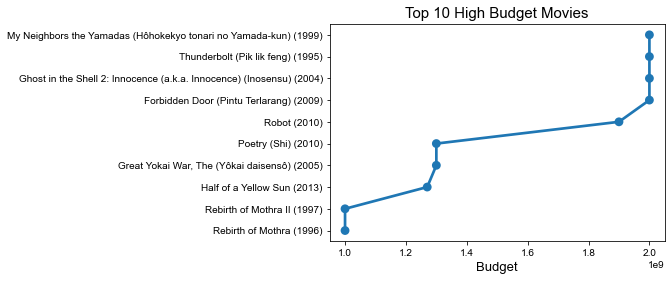

In [34]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(data_1['budget'].sort_values(ascending = False))
info['title'] = data_1['title']
data = list(map(str,(info['title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")